In [172]:
import numpy as np
import pandas as pd
import seaborn as sns

In [31]:
host_df = pd.read_csv('data/AB_NYC_2019.csv')
host_df.columns = host_df.columns.str.lower().str.replace(' ', '_')
for c in host_df.columns[host_df.dtypes == 'object']:
    host_df[c] = host_df[c].str.lower().replace(' ', '_')
host_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,clean & quiet apt home by the park,2787,john,brooklyn,kensington,40.64749,-73.97237,private room,149,1,9,2018-10-19,0.21,6,365
1,2595,skylit midtown castle,2845,jennifer,manhattan,midtown,40.75362,-73.98377,entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,the village of harlem....new york !,4632,elisabeth,manhattan,harlem,40.80902,-73.94190,private room,150,3,0,NaN,NaN,1,365
3,3831,cozy entire floor of brownstone,4869,lisaroxanne,brooklyn,clinton hill,40.68514,-73.95976,entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,entire apt: spacious studio/loft by central park,7192,laura,manhattan,east harlem,40.79851,-73.94399,entire home/apt,80,10,9,2018-11-19,0.10,1,0


<AxesSubplot:ylabel='Count'>

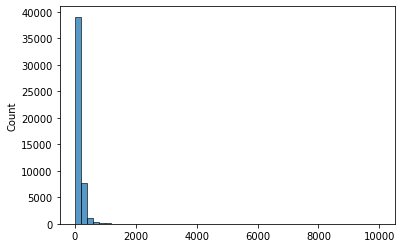

In [40]:
y_all = list(host_df['price'].iloc)
sns.histplot(y_all, bins=50)

In [44]:
names = list(host_df.dtypes.index)
for name in names:
    print(name)
    print(host_df[name].unique()[:5])
    print(host_df[name].nunique())
    print('\n')
print(host_df['price'].max())
print(host_df['price'].min())

id
[2539 2595 3647 3831 5022]
48895


name
['clean & quiet apt home by the park' 'skylit midtown castle'
 'the village of harlem....new york !' 'cozy entire floor of brownstone'
 'entire apt: spacious studio/loft by central park']
47487


host_id
[2787 2845 4632 4869 7192]
37457


host_name
['john' 'jennifer' 'elisabeth' 'lisaroxanne' 'laura']
11428


neighbourhood_group
['brooklyn' 'manhattan' 'queens' 'staten island' 'bronx']
5


neighbourhood
['kensington' 'midtown' 'harlem' 'clinton hill' 'east harlem']
221


latitude
[40.64749 40.75362 40.80902 40.68514 40.79851]
19048


longitude
[-73.97237 -73.98377 -73.9419  -73.95976 -73.94399]
14718


room_type
['private room' 'entire home/apt' 'shared room']
3


price
[149 225 150  89  80]
674


minimum_nights
[ 1  3 10 45  2]
109


number_of_reviews
[  9  45   0 270  74]
394


last_review
['2018-10-19' '2019-05-21' nan '2019-07-05' '2018-11-19']
1764


reviews_per_month
[0.21 0.38  nan 4.64 0.1 ]
937


calculated_host_listings_count
[6 2 1 

<AxesSubplot:ylabel='Count'>

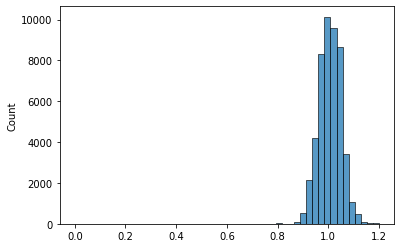

In [43]:
y_all = np.log1p(y_all)
sns.histplot(y_all, bins=50)

In [47]:
host_df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [113]:
col_names = ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

In [49]:
host_df['minimum_nights'].mean()

7.029962163820431

In [156]:
n = len(host_df)
n_test = int(n * 0.2)
n_train = n - n_test*2
idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)

In [157]:
host_train = host_df.iloc[idx[:n_train]]
host_test = host_df.iloc[idx[n_train:n_train+n_test]]
host_val = host_df.iloc[idx[n_train+n_test:]]

In [127]:
len(host_train)+ len(host_test) + len(host_val)

48895

In [158]:
host_train = host_train.reset_index(drop=True)
host_val = host_val.reset_index(drop=True)
host_test = host_test.reset_index(drop=True)

In [159]:
y_train = np.log1p(host_train['price'].values)
y_val = np.log1p(host_val['price'].values)
y_test = np.log1p(host_test['price'].values)

In [160]:
del host_train['price']
del host_test['price']
del host_val['price']

In [150]:
# def prepare_data_with_0(X):
#     data_prep = X[col_names]
#     data_prep = data_prep.fillna(0)
#     data = data_prep.values
#     return data

def lineral_regr(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    X_i = np.linalg.inv(XTX)
    w_full = X_i.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

def rmse(y_train, y_pred):
    error = y_train - y_pred
    se = error ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [170]:
X_train = prepare_data_with_0(host_train)
w0, w = lineral_regr(X_train, y_train)

X_val = prepare_data_with_0(host_val)
y_pred = w0 + X_val.dot(w)
rmse(y_pred, y_val)

0.645036676683792

In [169]:
def prepare_data_with_mean(X):
    data_prep = X[col_names]
    data_prep = data_prep.fillna(X[col_names].mean())
    data = data_prep.values
    return data

In [168]:
X_train_mean = prepare_data_with_mean(host_train)
w0, w = lineral_regr(X_train, y_train)

X_val_mean = prepare_data_with_mean(host_val)
y_pred = w0 + X_val.dot(w)
rmse(y_pred, y_val)

0.6979715021213179

In [167]:
def lineral_regr_with_reg(X, y, r = 0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    X_i = np.linalg.inv(XTX)
    w_full = X_i.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

def rmse(y_train, y_pred):
    error = y_train - y_pred
    se = error ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [166]:
X_train_mean = prepare_data_with_mean(host_train)
w0, w = lineral_regr_with_reg(X_train, y_train, r=0.001)

X_val_mean = prepare_data_with_mean(host_val)
y_pred = w0 + X_val.dot(w)
rmse(y_pred, y_val)

0.6979712224644151

In [177]:
host_full_train = pd.concat([host_train, host_test])
X_full_train = prepare_data_with_0(host_full_train)
y_full_train = np.concatenate([y_train, y_test])

w0, w = lineral_regr_with_reg(X_full_train, y_full_train, r=0.001)

X_test = prepare_data_with_0(host_test)
y_pred = w0 + X_test.dot(w)
rmse(y_pred, y_test)

0.6438029052709737

<AxesSubplot:ylabel='Count'>

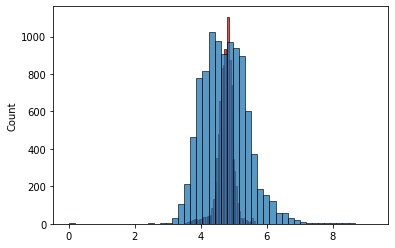

In [178]:
sns.histplot(y_pred, color='red', bins=50)
sns.histplot(y_test, bins=50)